In [ ]:
import pandas as pd
from textblob import TextBlob

# Load dataset
df_train = pd.read_csv('dataset/train.txt', sep='\t', header=None, names=['en', 'hinglish'])
df_dev = pd.read_csv('dataset/dev.txt', sep='\t', header=None, names=['en', 'hinglish'])
df_test = pd.read_csv('dataset/test.txt', sep='\\t', header=None, names=['en', 'hinglish'])

df = pd.concat([df_train, df_dev, df_test], ignore_index=True)

df['en'] = df['en'].astype(str).str.strip()
df['hinglish'] = df['hinglish'].astype(str).str.strip()

print(len(df))
print(df.head())

In [2]:
# Sentiment labels from English
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['label'] = df['en'].apply(get_sentiment)


# Save processed dataset
df[['hinglish','label']].to_csv('hinglish_sentiment.csv', index=False)
print(df.head())


                                                  en  \
0                                 Batman vs Superman   
1  The director is Zack Snyder , 27 % Rotten Toma...   
2                          Not very popular it seems   
3  But the audiences liked it . It has a B cinema...   
4                                                Yes   

                                            hinglish     label  
0                                 batman vs superman   neutral  
1  Zack Snyder director हैं , 27 % Rotten Tomatoe...   neutral  
2                       लगता है बहुत popular नहीं है  negative  
3  but audience ने like किया , इसका cinema score ...  positive  
4                                                yes   neutral  


In [ ]:
import re

def clean_hinglish(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)           # remove URLs
    text = re.sub(r"[^a-zA-Z\u0900-\u097F\s]", "", text)  # keep Hindi + English
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['hinglish_clean'] = df['hinglish'].apply(clean_hinglish)
print(df[['hinglish', 'hinglish_clean']].head())

In [4]:
df.head()

,en,hinglish,label,hinglish_clean
0,Batman vs Superman,batman vs superman,neutral,batman vs superman
1,"The director is Zack Snyder , 27 % Rotten Toma...","Zack Snyder director हैं , 27 % Rotten Tomatoe...",neutral,zack snyder director हैं rotten tomatoes
2,Not very popular it seems,लगता है बहुत popular नहीं है,negative,लगता है बहुत popular नहीं है
3,But the audiences liked it . It has a B cinema...,"but audience ने like किया , इसका cinema score ...",positive,but audience ने like किया इसका cinema score भी है
4,Yes,yes,neutral,yes


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [6]:
df.head()

,en,hinglish,label,hinglish_clean,label_encoded
0,Batman vs Superman,batman vs superman,neutral,batman vs superman,1
1,"The director is Zack Snyder , 27 % Rotten Toma...","Zack Snyder director हैं , 27 % Rotten Tomatoe...",neutral,zack snyder director हैं rotten tomatoes,1
2,Not very popular it seems,लगता है बहुत popular नहीं है,negative,लगता है बहुत popular नहीं है,0
3,But the audiences liked it . It has a B cinema...,"but audience ने like किया , इसका cinema score ...",positive,but audience ने like किया इसका cinema score भी है,2
4,Yes,yes,neutral,yes,1


In [40]:
df.to_csv('complete_hinglish_sentiment.csv', index=False)
df.head(10)

,en,hinglish,label,hinglish_clean,label_encoded
0,Batman vs Superman,batman vs superman,neutral,batman vs superman,1
1,"The director is Zack Snyder , 27 % Rotten Toma...","Zack Snyder director हैं , 27 % Rotten Tomatoe...",neutral,zack snyder director हैं rotten tomatoes,1
2,Not very popular it seems,लगता है बहुत popular नहीं है,negative,लगता है बहुत popular नहीं है,0
3,But the audiences liked it . It has a B cinema...,"but audience ने like किया , इसका cinema score ...",positive,but audience ने like किया इसका cinema score भी है,2
4,Yes,yes,neutral,yes,1
5,There is a huge divergence between proffession...,huge divergence है profession critic की opinio...,positive,huge divergence है profession critic की opinio...,2
6,I've never seen it,मैंने तो कभी नहीं देखा है .,neutral,मैंने तो कभी नहीं देखा है,1
7,I know the difference .,मुझे difference पाता है,neutral,मुझे difference पाता है,1
8,I can't believe they used Ben Affleck as Batman,मुझे तो believe ही नहीं होता कि उन्होंने Ben A...,neutral,मुझे तो believe ही नहीं होता कि उन्होंने ben a...,1
9,"So it probably won't get any awards , but shou...","So Probably इसको कोई award नहीं मिला , but box...",neutral,so probably इसको कोई award नहीं मिला but box o...,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['hinglish_clean'], df['label_encoded'], 
    test_size=0.25, random_state=42, stratify=df['label_encoded']
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



In [8]:
!pip install tensorflow
!pip show tensorflow

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rohit\.conda\envs\hinglish_sentiment\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenize Hinglish text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [14]:
print(X_train_seq[:], X_train_pad[:])

[[186, 13, 26, 3881, 1046, 9, 746, 323, 34, 42, 3, 8, 183, 12, 487, 186, 34, 3882, 1193, 9, 3883, 26, 263, 197, 3, 186, 2588, 3884, 20, 3885, 17, 867, 26, 8, 1359, 31, 3886], [409, 430, 275, 9, 72, 28, 110], [190, 304, 86, 8, 3887, 2589, 3, 1047, 4, 10, 56, 11, 2590, 5, 24, 305, 47, 4, 40, 195, 58, 166, 9, 179, 7, 31, 1949, 14, 62, 158, 168, 7, 4, 293, 62, 14, 3888, 20, 61, 4], [1950, 49, 176, 71, 3889, 950, 1194, 358, 2591, 21, 60, 1587, 26, 59, 2], [217, 324, 3, 2592, 3890, 3891, 5, 32, 3, 13, 488, 2], [109, 99, 264, 264, 602, 73, 2], [797, 1195, 6, 168, 7, 25], [23, 87, 2, 12, 72, 58, 798, 5, 103, 951, 3892, 652, 70], [45, 143, 799, 20, 325, 336, 1951, 51, 4], [63, 24, 8, 23, 1196, 2], [14, 8, 224, 800, 5, 32, 3, 4], [187, 128, 20, 747, 3893, 10, 3894, 5, 54, 208, 17, 22, 3895, 18], [285, 57, 410, 30], [16, 19, 214, 29, 56, 3, 1048, 1588, 653, 313, 868, 1197, 337, 18, 14, 128, 1589, 5, 24, 2593, 31, 115, 79, 14, 128, 34, 15, 9, 90, 5, 24, 23, 3896, 30, 136, 43], [27], [236], [41, 32

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_len))  
model.summary()

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode = "max",     # monitor validation loss
    patience=5,             # stop after 2 epochs with no improvement
    restore_best_weights=True,  # revert to best model
    verbose=1
)
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,035 (5.42 MB)

 Trainable params: 1,420,035 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=50,              # set a higher upper limit (it will stop early)
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.4724 - loss: 0.9325 - val_accuracy: 0.4927 - val_loss: 0.9204 - learning_rate: 0.0010
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.4793 - loss: 0.9248 - val_accuracy: 0.4927 - val_loss: 0.9247 - learning_rate: 0.0010
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.4835 - loss: 0.9235 - val_accuracy: 0.4931 - val_loss: 0.9203 - learning_rate: 0.0010
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.4888 - loss: 0.9222 - val_accuracy: 0.4927 - val_loss: 0.9175 - learning_rate: 0.0010
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.4915 - loss: 0.9167 - val_accuracy: 0.4922 - val_loss: 0.9165 - learning_rate: 0.0010
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.4903 - loss: 0.9067 - val_accuracy: 0.4971 - val_loss: 0.9193 - learning_rate: 0.0010
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5173 - l

In [ ]:
#model performance of unseen data
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7397 - loss: 0.9058
Test Accuracy: 0.7397
Test Loss: 0.9058


In [29]:
import numpy as np

y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


In [32]:
print(y_pred)

[1 2 2 ... 2 2 1]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.23      0.33       184
           1       0.77      0.79      0.78      1109
           2       0.72      0.78      0.75       958

    accuracy                           0.74      2251
   macro avg       0.68      0.60      0.62      2251
weighted avg       0.73      0.74      0.73      2251

F1-score: 0.7296099053736262


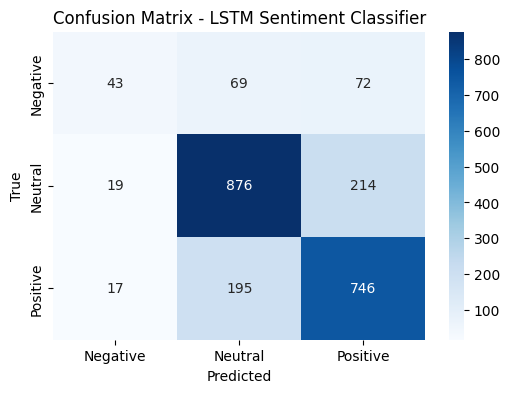

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LSTM Sentiment Classifier')
plt.show()


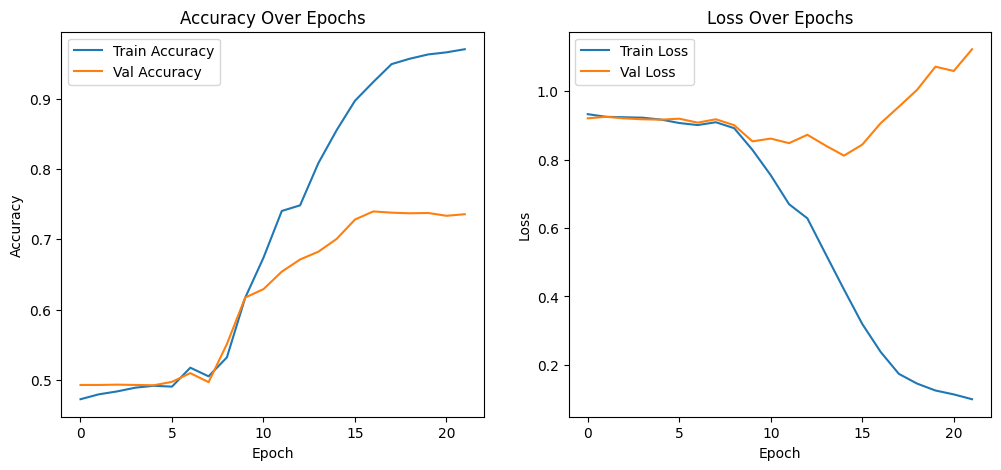

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
#Save the Model and Tokenizer

import pickle

# Save the trained LSTM model
model.save("lstm_hinglish_sentiment.keras")

# Save tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)